In [1]:
from os import path

import torch
print(torch.__version__)
print(torch.cuda.is_available())
from torchvision import datasets, transforms
import pandas as pd
import numpy as np
from path import Path
import torch.utils.data as data

from torch import nn
import numpy as np
import pandas as pd
import tqdm

import os
import os
from sklearn.model_selection import train_test_split
from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn.functional as F


all_letters="ACTG"

1.0.1.post2
True


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
df=pd.DataFrame()
azz={}

In [3]:
def plot_roc(y_test,y_score,n_classes):
    #y_test=N_elements
    #y_score=N_elements X N_classes
#     fpr = dict()
#     tpr = dict()
    y_test = label_binarize(y_test, classes=[0, 1, 2])
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    plt.figure()
    lw = 2
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    azz['fpr']=fpr['macro']
    azz['tpr']=tpr['macro']

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    print(fpr['macro'].shape,tpr['macro'].shape,roc_auc["macro"])

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('BiLSTM  FOR  BCLL  DATASET')
    plt.legend(loc="lower right")
    plt.show()



In [4]:
def letterToIndex(letter):
    return all_letters.find(letter)
def letterToTensor(letter):
  tensor=torch.zeros(1,4)
  tensor[0][letterToIndex(letter)] = 1
  return tensor
def lineToTensor(line):
  tensor=torch.zeros(len(line),1,4)
  for li,letters in enumerate(line):
    tensor[li][0][letterToIndex(letters)]=1
  return(tensor)

In [5]:
# lstm = nn.LSTM(input_size=4,hidden_size=100)  
# lstm=lstm.to(device)
# fc=nn.Linear(100,3).to(device)
# learning_rate = 0.05
# criterion = nn.NLLLoss().to(device)

In [6]:
File_object = open('label0.txt',"r")
label_txt=File_object.readlines()

 
len(label_txt)

4655

In [7]:
 

genename=pd.read_csv('preprocessed_BCLL.csv')
u=genename['B']
#print(genename)
# print(u)
mapz=pd.read_csv('sequence.csv')
len(u)

4655

In [8]:
key=mapz['gene'].tolist()
sequence=mapz['sequence'].tolist()

dictionary = dict(zip(key, sequence))


In [9]:
def gene_preprocessing(text):
  g=""
  u=0
  for i in text:
    if  ord(i)<=90 and ord(i)>=65:
      g=g+i.lower()
    else:
      g=g+i
  return(g)
len(genename['B'])
 

4655

In [10]:
loss_epoch=0
a=0
b=0
c=0
d=0
mint=99999999999999
maxt=-1
total_gene=[]
total_label=[]
count=0
for V in tqdm.tqdm(range(len(genename['B']))):
    j=genename['B'][V]
    GN=gene_preprocessing(j)
    #print(GN)
    lab=int(label_txt[V].replace('\n',''))
    #print(lab)
    if GN not in dictionary.keys():

        continue
#     print(GN)
    lin2TenGene=np.array(lineToTensor(dictionary[GN][:70]))
    if(lab==0):
        
#         if a>1000:
#       continue
        count=65
        a=a+count
        
    elif lab==1:
#         if b>1000:
#             continue
        count=8
        b=b+count
        
    else :
        count=1
        c=c+count
        
    for u in range(count):
        total_gene.append(lin2TenGene)
        cc=lineToTensor(dictionary[GN][:70])
    #     print(cc)
    #     print(cc[:,0,:].shape)
        total_label.append(lab)


print(a,b,c,d)

100%|██████████| 4655/4655 [00:14<00:00, 317.70it/s]

3640 3504 3781 0


In [11]:
for V in tqdm.tqdm(range(len(genename['B']))):
    j=genename['B'][V]
    GN=gene_preprocessing(j)
    #print(GN)
    lab=int(label_txt[V].replace('\n',''))
    #print(lab)
    if GN not in dictionary.keys():

        continue
    mint=min (len(dictionary[GN][:50]),mint)
    maxt=max (len(dictionary[GN][:50]),maxt)
#     print(GN)
    lin2TenGene=np.array(lineToTensor(dictionary[GN][:70]))
    if(lab==0):
        
        if a>975:
            continue
        else:
            total_gene.append(lin2TenGene)
            total_label.append(lab)
            
            a=a+1
    elif lab==1:
        continue


    
print(a,b,c,d)
print(mint,maxt)

100%|██████████| 4655/4655 [00:03<00:00, 1235.04it/s]

3640 3504 3781 0
50 50


In [12]:
print(len(total_gene))
print(len(total_label))

10925
10925


In [13]:
df = pd.DataFrame({'gen_name':total_gene,'gen_label':total_label})
df.to_csv('BCLL_LSTM_traintest.csv')
print(len(df))        
df['gen_name'][0].shape

10925


(70, 1, 4)

In [14]:
class SequenceFolder(data.Dataset):
    def __init__(self,root):
        self.dataset=root
        
    
    def __len__(self):
#         print(len(self.dataset))
        return len(self.dataset)       

    def __getitem__(self, index):
         return (np.array(total_gene[index]) ,np.array(total_label[index]))
#         print(self.dataset['gen_name'][index])          
#         try:
           
#         except :
            
total_set=SequenceFolder(df)  
print(len(total_set))
u=0
for x in total_set:
    print(u)
#     print(x)
    u=u+1
    print("yes")
    

10925
0
yes
1
yes
2
yes
3
yes
4
yes
5
yes
6
yes
7
yes
8
yes
9
yes
10
yes
11
yes
12
yes
13
yes
14
yes
15
yes
16
yes
17
yes
18
yes
19
yes
20
yes
21
yes
22
yes
23
yes
24
yes
25
yes
26
yes
27
yes
28
yes
29
yes
30
yes
31
yes
32
yes
33
yes
34
yes
35
yes
36
yes
37
yes
38
yes
39
yes
40
yes
41
yes
42
yes
43
yes
44
yes
45
yes
46
yes
47
yes
48
yes
49
yes
50
yes
51
yes
52
yes
53
yes
54
yes
55
yes
56
yes
57
yes
58
yes
59
yes
60
yes
61
yes
62
yes
63
yes
64
yes
65
yes
66
yes
67
yes
68
yes
69
yes
70
yes
71
yes
72
yes
73
yes
74
yes
75
yes
76
yes
77
yes
78
yes
79
yes
80
yes
81
yes
82
yes
83
yes
84
yes
85
yes
86
yes
87
yes
88
yes
89
yes
90
yes
91
yes
92
yes
93
yes
94
yes
95
yes
96
yes
97
yes
98
yes
99
yes
100
yes
101
yes
102
yes
103
yes
104
yes
105
yes
106
yes
107
yes
108
yes
109
yes
110
yes
111
yes
112
yes
113
yes
114
yes
115
yes
116
yes
117
yes
118
yes
119
yes
120
yes
121
yes
122
yes
123
yes
124
yes
125
yes
126
yes
127
yes
128
yes
129
yes
130
yes
131
yes
132
yes
133
yes
134
yes
135
yes
136
yes
137
yes


1940
yes
1941
yes
1942
yes
1943
yes
1944
yes
1945
yes
1946
yes
1947
yes
1948
yes
1949
yes
1950
yes
1951
yes
1952
yes
1953
yes
1954
yes
1955
yes
1956
yes
1957
yes
1958
yes
1959
yes
1960
yes
1961
yes
1962
yes
1963
yes
1964
yes
1965
yes
1966
yes
1967
yes
1968
yes
1969
yes
1970
yes
1971
yes
1972
yes
1973
yes
1974
yes
1975
yes
1976
yes
1977
yes
1978
yes
1979
yes
1980
yes
1981
yes
1982
yes
1983
yes
1984
yes
1985
yes
1986
yes
1987
yes
1988
yes
1989
yes
1990
yes
1991
yes
1992
yes
1993
yes
1994
yes
1995
yes
1996
yes
1997
yes
1998
yes
1999
yes
2000
yes
2001
yes
2002
yes
2003
yes
2004
yes
2005
yes
2006
yes
2007
yes
2008
yes
2009
yes
2010
yes
2011
yes
2012
yes
2013
yes
2014
yes
2015
yes
2016
yes
2017
yes
2018
yes
2019
yes
2020
yes
2021
yes
2022
yes
2023
yes
2024
yes
2025
yes
2026
yes
2027
yes
2028
yes
2029
yes
2030
yes
2031
yes
2032
yes
2033
yes
2034
yes
2035
yes
2036
yes
2037
yes
2038
yes
2039
yes
2040
yes
2041
yes
2042
yes
2043
yes
2044
yes
2045
yes
2046
yes
2047
yes
2048
yes
2049
yes
2050
yes
2

yes
3089
yes
3090
yes
3091
yes
3092
yes
3093
yes
3094
yes
3095
yes
3096
yes
3097
yes
3098
yes
3099
yes
3100
yes
3101
yes
3102
yes
3103
yes
3104
yes
3105
yes
3106
yes
3107
yes
3108
yes
3109
yes
3110
yes
3111
yes
3112
yes
3113
yes
3114
yes
3115
yes
3116
yes
3117
yes
3118
yes
3119
yes
3120
yes
3121
yes
3122
yes
3123
yes
3124
yes
3125
yes
3126
yes
3127
yes
3128
yes
3129
yes
3130
yes
3131
yes
3132
yes
3133
yes
3134
yes
3135
yes
3136
yes
3137
yes
3138
yes
3139
yes
3140
yes
3141
yes
3142
yes
3143
yes
3144
yes
3145
yes
3146
yes
3147
yes
3148
yes
3149
yes
3150
yes
3151
yes
3152
yes
3153
yes
3154
yes
3155
yes
3156
yes
3157
yes
3158
yes
3159
yes
3160
yes
3161
yes
3162
yes
3163
yes
3164
yes
3165
yes
3166
yes
3167
yes
3168
yes
3169
yes
3170
yes
3171
yes
3172
yes
3173
yes
3174
yes
3175
yes
3176
yes
3177
yes
3178
yes
3179
yes
3180
yes
3181
yes
3182
yes
3183
yes
3184
yes
3185
yes
3186
yes
3187
yes
3188
yes
3189
yes
3190
yes
3191
yes
3192
yes
3193
yes
3194
yes
3195
yes
3196
yes
3197
yes
3198
yes
3199
y

4339
yes
4340
yes
4341
yes
4342
yes
4343
yes
4344
yes
4345
yes
4346
yes
4347
yes
4348
yes
4349
yes
4350
yes
4351
yes
4352
yes
4353
yes
4354
yes
4355
yes
4356
yes
4357
yes
4358
yes
4359
yes
4360
yes
4361
yes
4362
yes
4363
yes
4364
yes
4365
yes
4366
yes
4367
yes
4368
yes
4369
yes
4370
yes
4371
yes
4372
yes
4373
yes
4374
yes
4375
yes
4376
yes
4377
yes
4378
yes
4379
yes
4380
yes
4381
yes
4382
yes
4383
yes
4384
yes
4385
yes
4386
yes
4387
yes
4388
yes
4389
yes
4390
yes
4391
yes
4392
yes
4393
yes
4394
yes
4395
yes
4396
yes
4397
yes
4398
yes
4399
yes
4400
yes
4401
yes
4402
yes
4403
yes
4404
yes
4405
yes
4406
yes
4407
yes
4408
yes
4409
yes
4410
yes
4411
yes
4412
yes
4413
yes
4414
yes
4415
yes
4416
yes
4417
yes
4418
yes
4419
yes
4420
yes
4421
yes
4422
yes
4423
yes
4424
yes
4425
yes
4426
yes
4427
yes
4428
yes
4429
yes
4430
yes
4431
yes
4432
yes
4433
yes
4434
yes
4435
yes
4436
yes
4437
yes
4438
yes
4439
yes
4440
yes
4441
yes
4442
yes
4443
yes
4444
yes
4445
yes
4446
yes
4447
yes
4448
yes
4449
yes
4

5561
yes
5562
yes
5563
yes
5564
yes
5565
yes
5566
yes
5567
yes
5568
yes
5569
yes
5570
yes
5571
yes
5572
yes
5573
yes
5574
yes
5575
yes
5576
yes
5577
yes
5578
yes
5579
yes
5580
yes
5581
yes
5582
yes
5583
yes
5584
yes
5585
yes
5586
yes
5587
yes
5588
yes
5589
yes
5590
yes
5591
yes
5592
yes
5593
yes
5594
yes
5595
yes
5596
yes
5597
yes
5598
yes
5599
yes
5600
yes
5601
yes
5602
yes
5603
yes
5604
yes
5605
yes
5606
yes
5607
yes
5608
yes
5609
yes
5610
yes
5611
yes
5612
yes
5613
yes
5614
yes
5615
yes
5616
yes
5617
yes
5618
yes
5619
yes
5620
yes
5621
yes
5622
yes
5623
yes
5624
yes
5625
yes
5626
yes
5627
yes
5628
yes
5629
yes
5630
yes
5631
yes
5632
yes
5633
yes
5634
yes
5635
yes
5636
yes
5637
yes
5638
yes
5639
yes
5640
yes
5641
yes
5642
yes
5643
yes
5644
yes
5645
yes
5646
yes
5647
yes
5648
yes
5649
yes
5650
yes
5651
yes
5652
yes
5653
yes
5654
yes
5655
yes
5656
yes
5657
yes
5658
yes
5659
yes
5660
yes
5661
yes
5662
yes
5663
yes
5664
yes
5665
yes
5666
yes
5667
yes
5668
yes
5669
yes
5670
yes
5671
yes
5

yes
6510
yes
6511
yes
6512
yes
6513
yes
6514
yes
6515
yes
6516
yes
6517
yes
6518
yes
6519
yes
6520
yes
6521
yes
6522
yes
6523
yes
6524
yes
6525
yes
6526
yes
6527
yes
6528
yes
6529
yes
6530
yes
6531
yes
6532
yes
6533
yes
6534
yes
6535
yes
6536
yes
6537
yes
6538
yes
6539
yes
6540
yes
6541
yes
6542
yes
6543
yes
6544
yes
6545
yes
6546
yes
6547
yes
6548
yes
6549
yes
6550
yes
6551
yes
6552
yes
6553
yes
6554
yes
6555
yes
6556
yes
6557
yes
6558
yes
6559
yes
6560
yes
6561
yes
6562
yes
6563
yes
6564
yes
6565
yes
6566
yes
6567
yes
6568
yes
6569
yes
6570
yes
6571
yes
6572
yes
6573
yes
6574
yes
6575
yes
6576
yes
6577
yes
6578
yes
6579
yes
6580
yes
6581
yes
6582
yes
6583
yes
6584
yes
6585
yes
6586
yes
6587
yes
6588
yes
6589
yes
6590
yes
6591
yes
6592
yes
6593
yes
6594
yes
6595
yes
6596
yes
6597
yes
6598
yes
6599
yes
6600
yes
6601
yes
6602
yes
6603
yes
6604
yes
6605
yes
6606
yes
6607
yes
6608
yes
6609
yes
6610
yes
6611
yes
6612
yes
6613
yes
6614
yes
6615
yes
6616
yes
6617
yes
6618
yes
6619
yes
6620
y

7741
yes
7742
yes
7743
yes
7744
yes
7745
yes
7746
yes
7747
yes
7748
yes
7749
yes
7750
yes
7751
yes
7752
yes
7753
yes
7754
yes
7755
yes
7756
yes
7757
yes
7758
yes
7759
yes
7760
yes
7761
yes
7762
yes
7763
yes
7764
yes
7765
yes
7766
yes
7767
yes
7768
yes
7769
yes
7770
yes
7771
yes
7772
yes
7773
yes
7774
yes
7775
yes
7776
yes
7777
yes
7778
yes
7779
yes
7780
yes
7781
yes
7782
yes
7783
yes
7784
yes
7785
yes
7786
yes
7787
yes
7788
yes
7789
yes
7790
yes
7791
yes
7792
yes
7793
yes
7794
yes
7795
yes
7796
yes
7797
yes
7798
yes
7799
yes
7800
yes
7801
yes
7802
yes
7803
yes
7804
yes
7805
yes
7806
yes
7807
yes
7808
yes
7809
yes
7810
yes
7811
yes
7812
yes
7813
yes
7814
yes
7815
yes
7816
yes
7817
yes
7818
yes
7819
yes
7820
yes
7821
yes
7822
yes
7823
yes
7824
yes
7825
yes
7826
yes
7827
yes
7828
yes
7829
yes
7830
yes
7831
yes
7832
yes
7833
yes
7834
yes
7835
yes
7836
yes
7837
yes
7838
yes
7839
yes
7840
yes
7841
yes
7842
yes
7843
yes
7844
yes
7845
yes
7846
yes
7847
yes
7848
yes
7849
yes
7850
yes
7851
yes
7

9286
yes
9287
yes
9288
yes
9289
yes
9290
yes
9291
yes
9292
yes
9293
yes
9294
yes
9295
yes
9296
yes
9297
yes
9298
yes
9299
yes
9300
yes
9301
yes
9302
yes
9303
yes
9304
yes
9305
yes
9306
yes
9307
yes
9308
yes
9309
yes
9310
yes
9311
yes
9312
yes
9313
yes
9314
yes
9315
yes
9316
yes
9317
yes
9318
yes
9319
yes
9320
yes
9321
yes
9322
yes
9323
yes
9324
yes
9325
yes
9326
yes
9327
yes
9328
yes
9329
yes
9330
yes
9331
yes
9332
yes
9333
yes
9334
yes
9335
yes
9336
yes
9337
yes
9338
yes
9339
yes
9340
yes
9341
yes
9342
yes
9343
yes
9344
yes
9345
yes
9346
yes
9347
yes
9348
yes
9349
yes
9350
yes
9351
yes
9352
yes
9353
yes
9354
yes
9355
yes
9356
yes
9357
yes
9358
yes
9359
yes
9360
yes
9361
yes
9362
yes
9363
yes
9364
yes
9365
yes
9366
yes
9367
yes
9368
yes
9369
yes
9370
yes
9371
yes
9372
yes
9373
yes
9374
yes
9375
yes
9376
yes
9377
yes
9378
yes
9379
yes
9380
yes
9381
yes
9382
yes
9383
yes
9384
yes
9385
yes
9386
yes
9387
yes
9388
yes
9389
yes
9390
yes
9391
yes
9392
yes
9393
yes
9394
yes
9395
yes
9396
yes
9

yes
10290
yes
10291
yes
10292
yes
10293
yes
10294
yes
10295
yes
10296
yes
10297
yes
10298
yes
10299
yes
10300
yes
10301
yes
10302
yes
10303
yes
10304
yes
10305
yes
10306
yes
10307
yes
10308
yes
10309
yes
10310
yes
10311
yes
10312
yes
10313
yes
10314
yes
10315
yes
10316
yes
10317
yes
10318
yes
10319
yes
10320
yes
10321
yes
10322
yes
10323
yes
10324
yes
10325
yes
10326
yes
10327
yes
10328
yes
10329
yes
10330
yes
10331
yes
10332
yes
10333
yes
10334
yes
10335
yes
10336
yes
10337
yes
10338
yes
10339
yes
10340
yes
10341
yes
10342
yes
10343
yes
10344
yes
10345
yes
10346
yes
10347
yes
10348
yes
10349
yes
10350
yes
10351
yes
10352
yes
10353
yes
10354
yes
10355
yes
10356
yes
10357
yes
10358
yes
10359
yes
10360
yes
10361
yes
10362
yes
10363
yes
10364
yes
10365
yes
10366
yes
10367
yes
10368
yes
10369
yes
10370
yes
10371
yes
10372
yes
10373
yes
10374
yes
10375
yes
10376
yes
10377
yes
10378
yes
10379
yes
10380
yes
10381
yes
10382
yes
10383
yes
10384
yes
10385
yes
10386
yes
10387
yes
10388
yes
10389


In [15]:
batch_size = 4
validation_split = .2
shuffle_dataset = True
random_seed= 42

# Creating data indices for training and validation splits:
dataset_size = len(total_set)
indices = list(range(dataset_size))
split = int(np.floor(validation_split * dataset_size))
if shuffle_dataset :
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, val_indices = indices[split:], indices[:split]

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
valid_sampler = SubsetRandomSampler(val_indices)

train_loader = torch.utils.data.DataLoader(total_set, batch_size=batch_size, 
                                           sampler=train_sampler,drop_last=True)
validation_loader = torch.utils.data.DataLoader(total_set, batch_size=batch_size,
                                                sampler=valid_sampler,drop_last=True)


In [16]:
for x,y in validation_loader:
    print(x.shape)

torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([4, 70, 1, 4])
torch.Size([

In [17]:
lstm = nn.LSTM(input_size=4,hidden_size=300,bidirectional=True) #input_size hidden_size num_layers 
lstm2=nn.LSTM(input_size=600,hidden_size=300)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        
        self.fc1=nn.Linear(300, 500)
        self.bn1=nn.BatchNorm1d(num_features=500)
        
        self.relu=nn.ReLU(inplace=True)
        self.fc2=nn.Linear(500, 200)
        self.bn2=nn.BatchNorm1d(num_features=200)

        self.fc3=nn.Linear(200, 100)
        self.bn3=nn.BatchNorm1d(num_features=100)
        
        self.fc4=nn.Linear(100, 3)
        self.sigm=nn.Sigmoid()
        self.dropout=nn.Dropout(0.2)
        
        

    def forward(self, x):
        y=self.sigm(self.fc4(self.bn3(self.fc3(self.bn2(self.dropout(self.relu(self.fc2(self.bn1(self.relu(self.fc1(x)))))))))))
        return(y)
    
device='cpu'

x=torch.zeros(5,5).to(device)

In [18]:
device='cpu'
model1=lstm.to(device)
model2=MLP().to(device)
model3=lstm2.to(device)
criterion = nn.CrossEntropyLoss()
optim_params = [
    {'params': model1.parameters(), 'lr': 0.0001},
    {'params': model2.parameters(), 'lr':0.0001},
    {'params': model3.parameters(), 'lr':0.0001}
        
]
optimizer = torch.optim.Adam(optim_params)
model1.load_state_dict(torch.load(Path('2AnkitBiLSTMBCLL1.pt'),map_location='cpu'))
model2.load_state_dict(torch.load(Path('2AnkitBiLSTMBCLL2.pt'),map_location='cpu'))
model3.load_state_dict(torch.load(Path('2AnkitBiLSTMBCLL3.pt'),map_location='cpu'))


In [19]:
epoch=10000
#3, 50, 1, 4

In [20]:
total_correct=0
total=0
confusion_matrix = torch.zeros(3, 3)
y_test=[]
y_score=[]

for GN,lab in (validation_loader):
    #gen_nam=GN[0]

    seq=GN
    seq=seq[:,:,0,:].permute(1,0,2)



    lab=lab.to(device)
    inp=seq.to(device)

    if inp.shape[1]==2:
        continue


    h0 = torch.zeros(2, 4, 300).to(device)   #(num_layers * num_directions, batch, hidden_size)
    c0 = torch.zeros(2, 4, 300).to(device)
    h_x2=c_x2=torch.zeros(1, 4, 300).to(device)
    output, (hn, cn) = model1(inp, (h0, c0))  
    output,(_,_)=model3(output,(h_x2,c_x2))
   # print(output.shape)
    q1,q2,q3=output.shape
    out_last=((output[q1-1]))
    

    After_fc=model2(out_last)
    y_score.append(After_fc)
    y_test.append(lab)
    print(After_fc.shape,lab.shape)

    _, preds = torch.max(After_fc, 1)
    total_correct=total_correct+torch.sum(preds.long().cpu()==lab.long())
    total=total+4

    for t, p in zip(lab.view(-1), preds.view(-1)):

        confusion_matrix[t.long(), p.long()] += 1
print(total_correct,total)
print(confusion_matrix)


torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) t

torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) t

torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) torch.Size([4])
torch.Size([4, 3]) t

In [21]:
y_testI=torch.cat(y_test,0)#1
y_scoreI=torch.cat(y_score,0)#2
print(y_testI.shape,y_scoreI.shape)

torch.Size([2184]) torch.Size([2184, 3])


(186,) (186,) 0.9411840858209912


<Figure size 432x288 with 0 Axes>

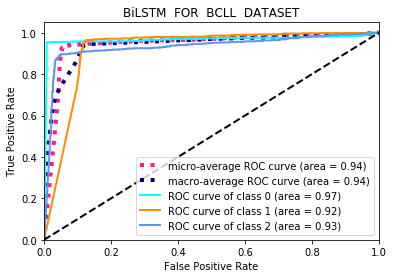

In [22]:
plot_roc(y_testI.cpu().numpy(),y_scoreI.detach().cpu().numpy(),3)

In [23]:

dataset = pd.DataFrame({'fpr':azz['fpr'],'tpr':azz['tpr']})

In [24]:
dataset.to_csv('bcll_lstm_roc.csv')